# UCI Heart failure clinical records Data Set

"Heart failure is the state in which muscles in the heart wall get fade and enlarge, limiting heart
pumping of blood. The ventricles of heart can get inflexible and do not fill properly between
beats. With the passage of time heart fails in fulfilling the proper demand of blood in body and
as a consequence person starts feeling difficulty in breathing."- ref: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001

This data set contains 13 columns:

Here is a description of each feature in the data:
(ref: http://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

### Features:
* *age* - Age of the patient (years)
* *anaemia* - If the patient has anaemia (0-No / 1-Yes)
* *creatinine_phosphokinase* - level of the CPK enzyme in the blood (mcg/L) 

**Note**: Creatinine phosphokinase is an enzyme in the body, and it is involved in maintaining blood pressure and enhances contractility of skeletal, cardiac and smooth muscles.

For men, the normal range is from 38 to 174 (U/L), whereas for women, the normal range is from 26 to 140 (U/L).

(ref: https://www.healthcheckup.com/general/high-cpk-levels-causes-symptoms-side-effects-treatment/)

* *diabetes* - If the patient has diabetes (0-No / 1-Yes)                   
* *ejection_fraction* - Percentage of blood leaving the heart at each contraction (percentage)                   
* *high_blood_pressure* - If a patient has hypertension (0-No / 1-Yes)      
* *platelets* - Platelets in the blood (kiloplatelets/mL)                       
* *serum_creatinine* - Level of creatinine in the blood (mg/dL) 

**Note**: serum_creatinine is a measurement for the function of kidneys. 

The normal range varies between different ages, and normally it's higher in men than in women.

For adualt men (from 41 to 50 years old), the normal range is from 0.7 to 1.4 (mg/dL), and for men from 51 to 60 years old, the normal range is from 0.7 to 1.3 (mg/dL).

However, for adualt women (from 41 to 50 years old), the normal range is from 0.4 to 0.9 (mg/dL), and for women from 51 to 60 years old, the normal range is from 0.6 to 1.3 (mg/dL).

(ref: https://www.healthcheckup.com/general/normal-creatinine-levels-by-age/) 

* *serum_sodium* - Level of sodium in the blood (mEq/L)  

**Note**: serum_sodium is also a measurement for the function of kidneys.

The normal blood sodium levels range from 135 to 145 (mEq/L) 

(ref: https://www.healthcheckup.com/general/normal-sodium-levels-in-blood/)

* *sex* - Gender of the patient (0-Female / 1-Male)                                
* *smoking* - If the patient smokes (0-No / 1-Yes)                       
* *time* - Follow-up period (days)        

### Target

*DEATH_EVENT* - If the patient died during the follow-up period (0-No / 1-Yes)

In [184]:
import pickle
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import ensemble
import sklearn.neural_network as nn
import sklearn.model_selection as ms


%matplotlib inline
# disable warnings
import warnings
warnings.filterwarnings('ignore')

In [185]:
# read in the json files
heart_failur_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failur_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data exploration

In [186]:
heart_failur_df.shape # 299 rows & 13 columns including the target

(299, 13)

In [187]:
heart_failur_df.info() # no null values, all features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [188]:
# double-check if there is any missing values
# no data cleaning needed
heart_failur_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [189]:
# check distribution for the target 'DEATH_EVENT'
target_dist = heart_failur_df['DEATH_EVENT'].value_counts()
positive_perc = target_dist[1] / len(heart_failur_df) * 100

print(f"About {round(positive_perc, 2)}% of the data is positive class.")

About 32.11% of the data is positive class.


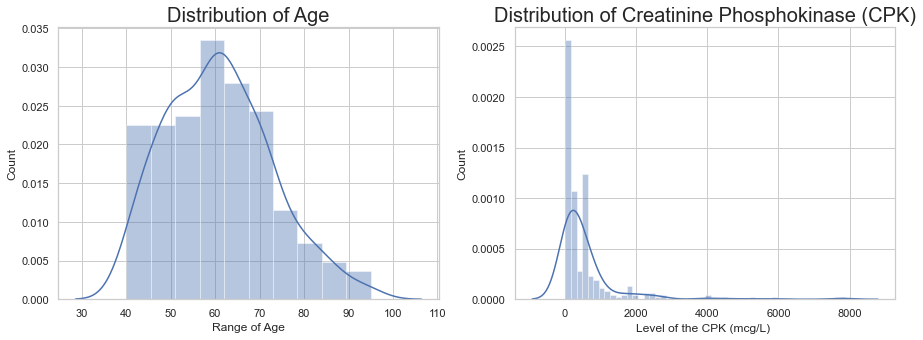

Text(0, 0.5, 'Count')

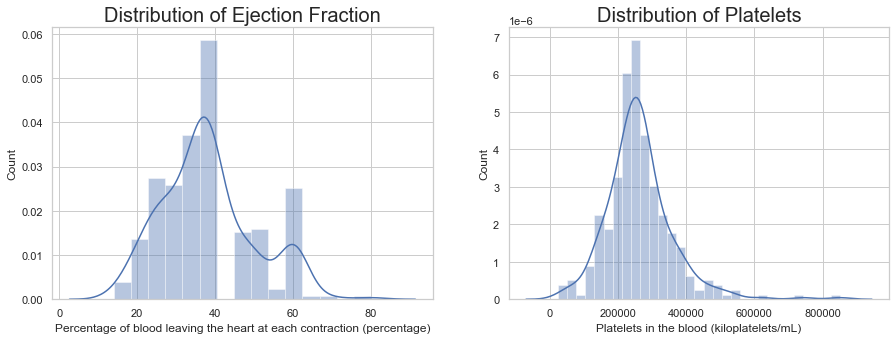

In [190]:
# visualise the distribution of a couple of numerical features
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['creatinine_phosphokinase'])
plt.title('Distribution of Creatinine Phosphokinase (CPK)', fontsize = 20)
plt.xlabel('Level of the CPK (mcg/L) ')
plt.ylabel('Count')
plt.show()

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['ejection_fraction'])
plt.title('Distribution of Ejection Fraction', fontsize = 20)
plt.xlabel('Percentage of blood leaving the heart at each contraction (percentage)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['platelets'])
plt.title('Distribution of Platelets', fontsize = 20)
plt.xlabel('Platelets in the blood (kiloplatelets/mL)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

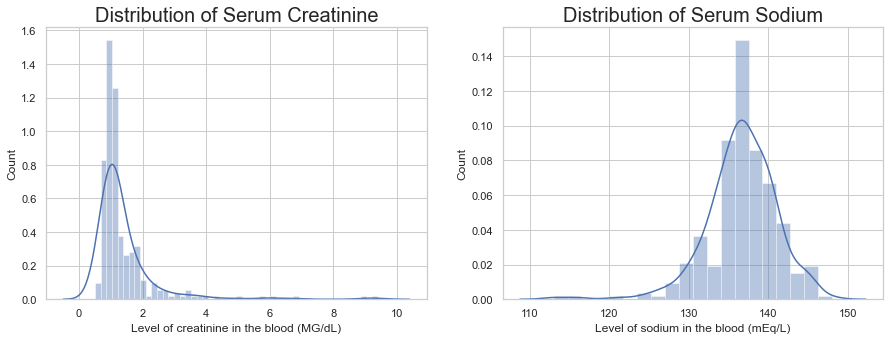

In [191]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['serum_creatinine'])
plt.title('Distribution of Serum Creatinine', fontsize = 20)
plt.xlabel('Level of creatinine in the blood (MG/dL)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(heart_failur_df['serum_sodium'])
plt.title('Distribution of Serum Sodium', fontsize = 20)
plt.xlabel('Level of sodium in the blood (mEq/L)')
plt.ylabel('Count')

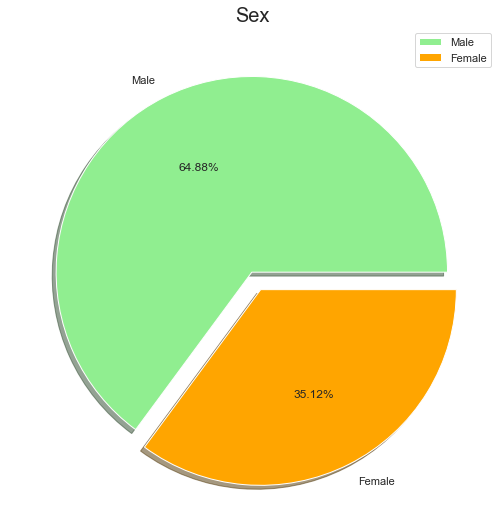

In [192]:
# visualise gender column
labels = ['Male', 'Female']
size = heart_failur_df['sex'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [193]:
# visualise how "age" related to the target "DEATH_EVENT"
fig = px.histogram(heart_failur_df, x="age", color="DEATH_EVENT")
fig.show()

In [194]:
# visualise how "sex" related to the target "DEATH_EVENT"
len_total = len(heart_failur_df)
len_female = len(heart_failur_df[heart_failur_df["sex"]==0])
len_male = len_total - len_female

# in the "sex" column, 0-Female, 1-male
# in the "DEATH_EVENT" column, 0-survived 1-dead
male_died = len(heart_failur_df.loc[(heart_failur_df["DEATH_EVENT"]==1) &(heart_failur_df['sex']==1)])
male_survived = len_male - male_died

female_died = len(heart_failur_df.loc[(heart_failur_df["DEATH_EVENT"]==1) & (heart_failur_df['sex']==0)])
female_survived = len_female - female_died

labels = ['Male died','Male survived','Female died','Female survived']
values = [male_died, male_survived, female_died, female_survived]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of DEATH EVENT based on the gender of the patients")
fig.show()

In [195]:
# get correlation coefficients
corr_df = heart_failur_df.corr()
corr_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603


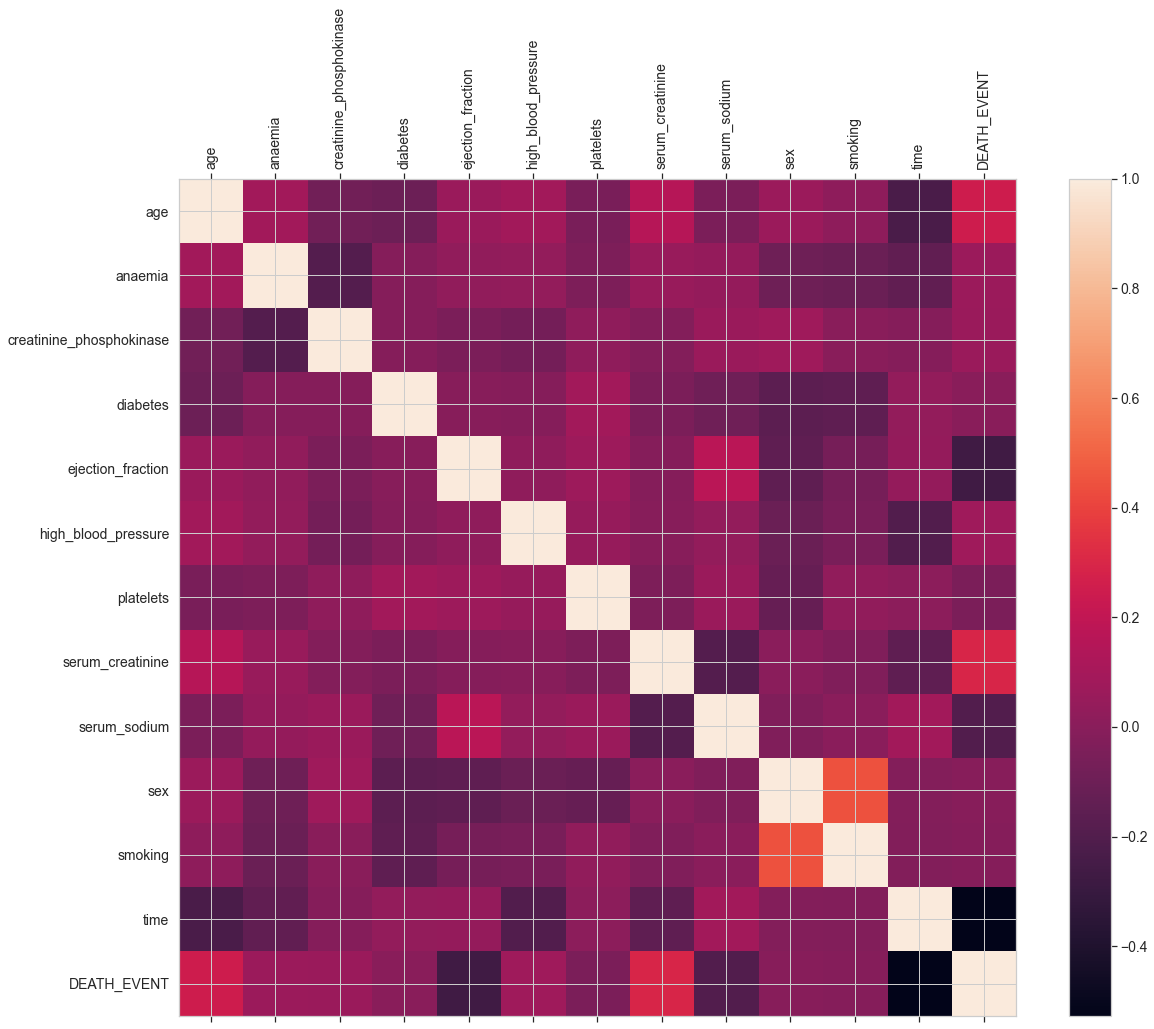

In [196]:
# plot the correlation figure
f = plt.figure(figsize=(19, 15))
plt.matshow(heart_failur_df.corr(), fignum=f.number)
plt.xticks(range(heart_failur_df.shape[1]), heart_failur_df.columns, fontsize=14, rotation=90)
plt.yticks(range(heart_failur_df.shape[1]), heart_failur_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [197]:
# sort based on correlations from high to low
# surprisingly 'time' feature has the highest correlation to the target
# the description for this feature is very vague and not sure what it is used to measure
# but in the baseline model we will be using all the 12 features.
corr_df['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

Apart from 'time', 'serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium' are all highly correlated to the target 'DEATH_EVENT'

# Build Models


## Split data

In [198]:
# try if we normalize numerical features before training model
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://stats.stackexchange.com/questions/59392/should-you-ever-standardise-binary-variables

# cols_norm = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# for col in cols_norm:
#     scaler = MinMaxScaler()
#     heart_failur_df[col] = scaler.fit_transform(heart_failur_df.loc[:, [col]])

# The performance of the model (with default parameters) seems not improved after normalization (except for MLPClassifier) 
# but since without tuning, its performance is not good so the code for normalization have been commented out.

In [199]:
heart_failur_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [200]:
# split dataset into training set/testing set
def train_test_split(df, train_frac= 0.7, seed=1):
    """Shuffle the data and randomly split into train and test sets;
       separate the class labels from the features.
    
    :param df: Dataframe of all the data
    :param train_frac: The decimal fraction of data that should be training data
    :param seed: Random seed for shuffling and reproducibility, default = 1
    :return: Two tuples (in order): (train_features, train_labels), (test_features, test_labels)
    """
    
    # shuffle and split the data
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
    np.random.seed(seed) #from the function input, seed = 1, this is for the output consistency
    df_np = df.to_numpy()
    np.random.shuffle(df_np) #perform shuffle
    
    #define training data size
    train_size = int(train_frac * df_np.shape[0])
    x_train = df_np[:train_size, :-1]
    y_train = df_np[:train_size,-1] #only keep the last label column
    
    # define testing set
    x_test = df_np[train_size:, :-1]
    y_test = df_np[train_size:, -1]
    
    return (x_train, y_train), (x_test, y_test)

In [201]:
# shuffle the data and split it into training and testing data with 7:3
(x_train, y_train), (x_test, y_test) = train_test_split(heart_failur_df, train_frac=0.7)

In [202]:
print('The total number of rows for training set is:', len(x_train))
print('The total number of rows for testing set is:', len(x_test))

The total number of rows for training set is: 209
The total number of rows for testing set is: 90


In [203]:
# convert array to df type
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [204]:
columns_name = heart_failur_df.columns[:-1]
x_train.columns = columns_name
x_test.columns = columns_name

In [205]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,50.0,1.0,115.0,0.0,20.0,0.0,189000.0,0.8,139.0,1.0,0.0,146.0
1,45.0,0.0,582.0,1.0,55.0,0.0,543000.0,1.0,132.0,0.0,0.0,250.0
2,53.0,1.0,91.0,0.0,20.0,1.0,418000.0,1.4,139.0,0.0,0.0,43.0
3,52.0,0.0,132.0,0.0,30.0,0.0,218000.0,0.7,136.0,1.0,1.0,112.0
4,65.0,1.0,135.0,0.0,35.0,1.0,290000.0,0.8,134.0,1.0,0.0,194.0


In [206]:
print('Data shape (rows, cols): ', x_train.shape) # 12 features

Data shape (rows, cols):  (209, 12)


Train individual classifier models as well as an ensemble model

In [207]:
lr_clf = LogisticRegression(random_state=42)
rf_clf = ensemble.RandomForestClassifier(random_state=42)
dt_clf = tree.DecisionTreeClassifier(random_state=42)
ext_clf = ensemble.ExtraTreesClassifier(random_state=42)
mlp_clf = nn.MLPClassifier(random_state=42)

voting_classifier = ensemble.VotingClassifier([
                                            ('lr_clf', LogisticRegression(random_state=42)),
                                            ('rf_clf', ensemble.RandomForestClassifier(random_state=42)),
                                            ('dt_clf', tree.DecisionTreeClassifier(random_state=42)),
                                            ('ext_clf', ensemble.ExtraTreesClassifier(random_state=42)),
                                            ('mlp_clf', nn.MLPClassifier(random_state=42))
                                            ], voting='hard')

In [208]:
lr_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
dt_clf.fit(x_train, y_train)
ext_clf.fit(x_train, y_train)
mlp_clf.fit(x_train, y_train)
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('lr_clf', LogisticRegression(random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(random_state=42)),
                             ('dt_clf',
                              DecisionTreeClassifier(random_state=42)),
                             ('ext_clf', ExtraTreesClassifier(random_state=42)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [209]:
estimators = [lr_clf, rf_clf, dt_clf, ext_clf, mlp_clf, voting_classifier]

cv = ms.RepeatedKFold(n_splits=4, n_repeats=10, random_state=42)

for estimator in estimators:
    cv_accuracy = ms.cross_val_score(estimator, x_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')
    f1_score = ms.cross_val_score(estimator, x_train, y_train, cv=cv, n_jobs=-1, scoring='f1')
    print(estimator.__class__.__name__)
    print(f'Avg Accuracy: {np.mean(cv_accuracy) * 100}')
    print(f'Std Accuracy: {np.std(cv_accuracy) * 100}')
    print(f'Avg F1: {np.mean(f1_score) * 100}')
    print(f'Std F1: {np.std(f1_score) * 100}')
    print()

LogisticRegression
Avg Accuracy: 78.33635703918722
Std Accuracy: 6.879051126823437
Avg F1: 62.39544718087329
Std F1: 11.28538044823316

RandomForestClassifier
Avg Accuracy: 84.1718069666183
Std Accuracy: 4.430766828532929
Avg F1: 73.42752513024831
Std F1: 7.674472703015124

DecisionTreeClassifier
Avg Accuracy: 75.74746008708273
Std Accuracy: 5.173310436889572
Avg F1: 61.61001088526723
Std F1: 8.404474584731469

ExtraTreesClassifier
Avg Accuracy: 78.4887518142235
Std Accuracy: 5.60462681819869
Avg F1: 59.857939639564165
Std F1: 9.611015887097931

MLPClassifier
Avg Accuracy: 67.47369375907112
Std Accuracy: 6.53568266649667
Avg F1: 0.0
Std F1: 0.0

VotingClassifier
Avg Accuracy: 80.64132801161102
Std Accuracy: 5.923488318201983
Avg F1: 64.22971697064428
Std F1: 9.607840830269968



From the result above, MLPClassifier with default parameters performs the worst, so we drop it from the ensemble model.

In [210]:
# re-train the ensemble model
new_voting_classifier = ensemble.VotingClassifier([
                                            ('lr_clf', LogisticRegression(random_state=42)),
                                            ('rf_clf', ensemble.RandomForestClassifier(random_state=42)),
                                            ('dt_clf', tree.DecisionTreeClassifier(random_state=42)),
                                            ('ext_clf', ensemble.ExtraTreesClassifier(random_state=42))
                                            ], voting='hard')

new_voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('lr_clf', LogisticRegression(random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(random_state=42)),
                             ('dt_clf',
                              DecisionTreeClassifier(random_state=42)),
                             ('ext_clf',
                              ExtraTreesClassifier(random_state=42))])

In [211]:
new_cv_accuracy = ms.cross_val_score(new_voting_classifier, x_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')

new_f1_score = ms.cross_val_score(new_voting_classifier, x_train, y_train, cv=cv, n_jobs=-1, scoring='f1')

print(new_voting_classifier.__class__.__name__)
print(f'Avg Accuracy: {np.mean(new_cv_accuracy) * 100}')
print(f'Std Accuracy: {np.std(new_cv_accuracy) * 100}')
print(f'Avg F1: {np.mean(new_f1_score) * 100}')
print(f'Std F1: {np.std(new_f1_score) * 100}')

VotingClassifier
Avg Accuracy: 80.64132801161102
Std Accuracy: 5.923488318201983
Avg F1: 64.22971697064428
Std F1: 9.607840830269968


In [212]:
# check ferformance on testing data
estimators = [lr_clf, rf_clf, dt_clf, ext_clf, new_voting_classifier]

for estimator in estimators:
    print(estimator.__class__.__name__)
    print(estimator.score(x_test, y_test) * 100) # accuracy
    print()

LogisticRegression
87.77777777777777

RandomForestClassifier
88.88888888888889

DecisionTreeClassifier
81.11111111111111

ExtraTreesClassifier
84.44444444444444

VotingClassifier
86.66666666666667



In [213]:
# pick RandomForestClassifier model to deploy
#y_pred = rf_clf.predict(x_test)

In [214]:
# save RandomForestClassifier model to disk
pickle_out = open("random_forest_classifier.pkl", "wb")
pickle.dump(rf_clf, pickle_out)
pickle_out.close()

In [247]:
y_pred = rf_clf.predict([[50,0,500,0,20,0,250000,1.5,110,0,0,2]])
y_pred

array([1.])

In [251]:
death_event[y_pred[0]]

'dead'

In [237]:
y_prob = rf_clf.predict_proba([[50,0,500,0,20,0,250000,1.5,110,0,0,2]])

In [238]:
# load the RandomForestClassifier model from disk
#loaded_rf_model = pickle.load(open("random_forest_classifier.pkl", "rb"))

In [239]:
death_event = {
            0: 'survival',
            1: 'dead'
        }

In [240]:
death_event[np.argmax(y_prob)]

'dead'

In [241]:
round(max(y_prob[0]), 2)

0.86